# Homework 3
Josh Cohen

In [246]:
import sympy as sym
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp, trapz

In [236]:
#tommy's rk4
def integrate(f,x0,dt):
    k1=dt*np.squeeze(f(x0))
    k2=dt*np.squeeze(f(x0+k1/2.))
    k3=dt*np.squeeze(f(x0+k2/2.))
    k4=dt*np.squeeze(f(x0+k3))
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    print(xnew)
    return xnew

## Problem 1

**a).** if $\dot{x} = -\sin{(x)}$ & $x(0) = x_0 $, plot $e^-t$ & $x(t)$ on the same graph, what would be a good choice for $x_0$?

In [115]:
t, T, x0, tau = sym.symbols('t T, x_0 tau')
x = sym.Function('x')(t)
xdot = sym.lambdify([t, x], -sym.sin(x))
x0 = 0.8
T = 10
steps = 100
ret = solve_ivp(xdot, (0, 10), [x0], max_step=T/float(steps))

(102,)


<IPython.core.display.Javascript object>


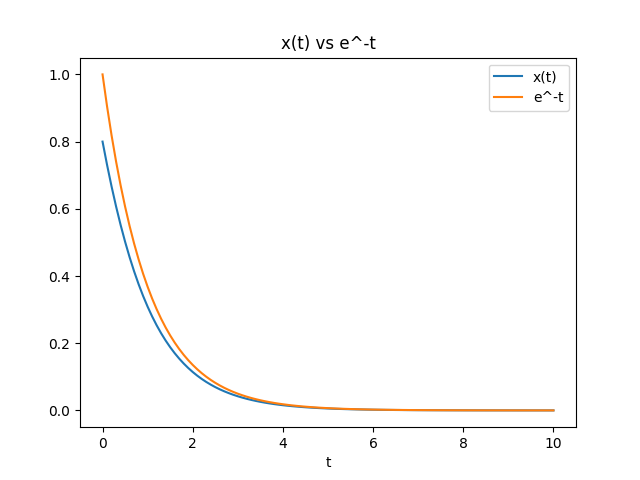

In [117]:
yvals = np.squeeze(ret.y)
xvals = np.squeeze(ret.t)
plt.figure()
plt.plot(xvals,yvals)
plt.plot(xvals, np.exp(-xvals))
plt.legend(["x(t)", "e^-t"])
plt.title("x(t) vs e^-t")
plt.xlabel("t")
plt.show()

**b).** turn in a plot of J vs x0 from 0.9 to 11, where should the minimum be?

In [163]:
l = sym.lambdify([t, x], (sym.exp(-t) - x)**2)
x0_list = np.arange(0.9, 1.1, .002)

J_sum = []

for x0 in x0_list:
    ret = solve_ivp(xdot, (0, 10), [x0], max_step=T/float(steps))
    xvals = ret.y.reshape(-1)
    tvals = ret.t.reshape(-1)
    Jsum = 0
    for (x,t) in zip(xvals,tvals):
        Jsum += l(t, x)

    J_sum.append(Jsum)

J_sum

<IPython.core.display.Javascript object>


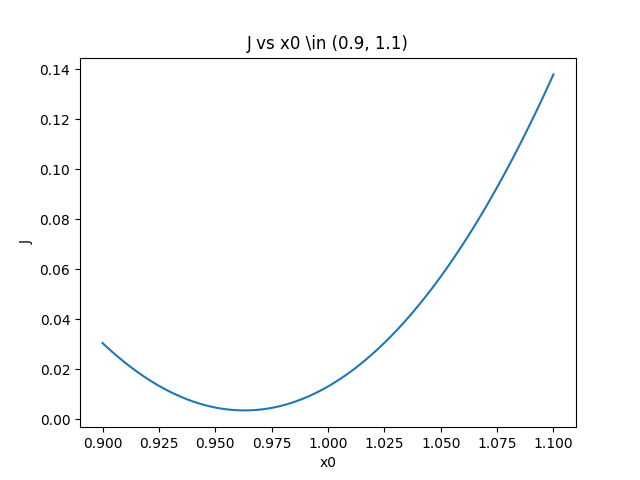

In [168]:
plt.figure()
plt.plot(x0_list, J_sum)

plt.ylabel("J")
plt.xlabel("x0")
plt.title("J vs x0 \in (0.9, 1.1)")

plt.show()

therefore we can roughly expect the minimum to be at ~x0 of 0.96

**c).** Create a function that provides the gradient of J, evaluate at gradient of $x_0 = 1.0$

In [387]:
#need to obtain Dl(x(t)) and integrate to be left with phi(t,0)
t, t0 = sym.symbols('t t_0')
x = sym.Function('x')(t)
display(x)
phi = sym.Function('phi')(t, 0) 
display(phi)
Dl = sym.lambdify([t, x],((sym.exp(-t)- x) **2).diff(x))
print("L is:")
display((sym.exp(-t)- x) **2)
print("DL(x) is:")
display(((sym.exp(-t)- x) **2).diff(x))

x(t)

phi(t, 0)

L is:


(-x(t) + exp(-t))**2

DL(x) is:


2*x(t) - 2*exp(-t)

In [419]:
#lets numerically obtain phi
xdot = -sym.sin(x)
print("xdot:")
display(xdot)
A = xdot.diff(x)
print("A matrix:")
display(A)
# xdot = sym.lambdify([t,x], xdot)
phidot = sym.lambdify([t, [x, phi]], sym.Array([xdot ,A * phi]))

print("phidot:")
display(A * phi)
#given: use x0 = 1.0
x0 = 1.0
# ret_x = solve_ivp(xdot, (0,10), [x0], max_step=T/float(steps))
ret_phi = solve_ivp(phidot, (0,10), np.array([x0, 1.0]), max_step=T/float(steps))

xdot:


-sin(x(t))

A matrix:


-cos(x(t))

phidot:


-phi(t, 0)*cos(x(t))

In [420]:
ret_phi.y.shape

(2, 102)

In [421]:
tvals = ret_phi.t.reshape(-1)
xvals = ret_phi.y[0,:]
phivals = ret_phi.y[1,:]

In [407]:
print(xvals)
print(ret_x.y.reshape(-1))

[1.00000000e+00 9.45258581e-01 8.89519388e-01 8.33437141e-01
 7.77662032e-01 7.22806406e-01 6.69417045e-01 6.17955561e-01
 5.68787840e-01 5.22181973e-01 4.78313133e-01 4.37273302e-01
 3.99083764e-01 3.63708586e-01 3.31067742e-01 3.01049037e-01
 2.73518369e-01 2.48328198e-01 2.25324261e-01 2.04350722e-01
 1.85253977e-01 1.67885356e-01 1.52102941e-01 1.37772699e-01
 1.24769110e-01 1.12975394e-01 1.02283485e-01 9.25937990e-02
 8.38148841e-02 7.58629854e-02 6.86615700e-02 6.21408304e-02
 5.62371876e-02 5.08928045e-02 4.60551188e-02 4.16764003e-02
 3.77133347e-02 3.41266359e-02 3.08806868e-02 2.79432084e-02
 2.52849553e-02 2.28794365e-02 2.07026613e-02 1.87329065e-02
 1.69505043e-02 1.53376503e-02 1.38782278e-02 1.25576494e-02
 1.13627123e-02 1.02814674e-02 9.30310099e-03 8.41782690e-03
 7.61678922e-03 6.89197401e-03 6.23612940e-03 5.64269317e-03
 5.10572728e-03 4.61985855e-03 4.18022493e-03 3.78242693e-03
 3.42248364e-03 3.09679290e-03 2.80209531e-03 2.53544159e-03
 2.29416309e-03 2.075845

In [422]:
integrand = np.multiply(Dl(tvals, xvals) , phivals)

In [423]:
trapz(integrand, tvals)

0.051869586762385005

In [331]:
display( A * phi)

-phi(t, 0)*cos(x(t))